In [48]:
import numpy as np

X = np.array([[1, 1, 3.1], [1, 12, 2.2], [1, -3, 0.1], [1, 2, 0.5], [1, 0, 11.3]])
Y = np.array([1.1, 2.5, 2.2, 4, 1])

beta = np.linalg.inv(X.T @ X) @ X.T @ Y
beta

array([ 2.6650842 ,  0.03617287, -0.17206369])

In [49]:
Y_hat = X @ beta
Y_hat

array([2.16785964, 2.72061849, 2.53935923, 2.65139809, 0.72076456])

In [50]:
TSS = np.sum(np.power(Y-np.mean(Y), 2))
ESS = np.sum(np.power(Y_hat-np.mean(Y_hat), 2))
RSS = np.sum(np.power(Y-Y_hat, 2))
R_sq = ESS/TSS
print("TSS =", round(TSS, 2))
print("ESS =", round(ESS, 2))
print("RSS =", round(RSS, 2))
print("R^2 =", round(R_sq, 2))

TSS = 5.97
ESS = 2.77
RSS = 3.2
R^2 = 0.46


In [10]:
n = X.shape[0]
k = X.shape[1]
sigma = RSS/(n-k)
sigma

1.6004304828005549

In [13]:
var_beta = sigma * np.linalg.inv(X.T @ X) 
var_beta

array([[ 0.64997409, -0.03581079, -0.0709134 ],
       [-0.03581079,  0.01253028,  0.00166805],
       [-0.0709134 ,  0.00166805,  0.0194506 ]])

In [24]:
from scipy.stats import t
print((beta[1]-1)/var_beta[1,1])
print(t.isf(q=0.05, df=5-3))

-76.91982325761974
2.9199855803555175


In [26]:
print((beta[2]-1)/var_beta[2,2])
print(t.isf(q=0.1, df=5-3))

-60.25847775356395
1.88561808316415


In [72]:
RSS_r

5.9719999999999995

In [71]:
from scipy.stats import f
X_r = X[:, 0].reshape(-1, 1)
beta_r = np.linalg.inv(X_r.T @ X_r) @ X_r.T @ Y
Y_hat_r = np.ones_like(Y)*beta_r
RSS_r = np.sum(np.power(Y-Y_hat_r, 2))
F_obs = (RSS_r-RSS)/(X.shape[1]-1)/(RSS/(X.shape[0]-X.shape[1]))
print("F-наблюдаемое =", F_obs)
print("F-критическое =", f.isf(q=0.05, dfn=3-1, dfd=5-3))
print("p-value =", f.sf(F_obs, dfn=3-1, dfd=5-3))

F-наблюдаемое = 0.865748017230258
F-критическое = 18.999999999999982
p-value = 0.5359780585400384


In [81]:
RSS_r

5.623592646316851

In [77]:
X_r = np.vstack([X[:, 0], X[:,1]+X[:,2]]).T
beta_r = np.linalg.inv(X_r.T @ X_r) @ X_r.T @ Y
Y_hat_r = X_r @ beta_r
RSS_r = np.sum(np.power(Y-Y_hat_r, 2))
F_obs = (RSS_r-RSS)/(X.shape[1]-1)/(RSS/(X.shape[0]-X.shape[1]))
print("F-наблюдаемое =", F_obs)
print("F-критическое =", f.isf(q=0.05, dfn=3-2, dfd=5-3))
print("p-value =", f.sf(F_obs, dfn=3-2, dfd=5-3))

F-наблюдаемое = 0.7569000049524992
F-критическое = 18.512820512820497
p-value = 0.47602719507048197


# Прикладная статистика в машинном обучении 2021-2022

## Домашнее задание #1

## Часть 2

### Дедлайн: 29 октября 2021 года, 23:59

**Правила игры**

1. Домашнее задание состоит из двух частей. Часть 1 содержит 13 обязательных и две бонусных задачи и предполагает решение «от руки». Часть 2 содержит 3 обязательных задачи и предполагает программное решение.


2. Домашнее задание оценивается в $80$ баллов. При этом часть 1 оценивается в $65$ баллов, а часть 2 – в $15$ баллов. По умолчанию за каждый пункт каждой задачи можно получить $1$ балл. Однако за некоторые пункты некоторых задач можно получить другое количество баллов, которое явно указано в скобках рядом с меткой пункта.


3. Каждый пункт оценивается с промежутком $0.5$. Например, если за пункт можно получить максимум $1$ балл, то за полностью корректное решение ставится $1$ балл, за решение с небольшими ошибками ставится $0.5$ балла, за решение с серьёзными ошибками или неправильное решение ставится $0$ баллов. Для пунктов, за которые можно получить максимум $2$ балла, в зависимости от решения можно получить $2$, $1.5$, $1$ и т.д. баллов. При этом пункты проверяются независимо друг от друга: если пункт $t+1$ зависит от численных результатов пункта $t$, и в пункте $t$ допускается ошибка, из-за которой в пункт $t+1$ приходят неверные входные данные, то при корректном решении пункт $t+1$ оценивается в максимальное количество баллов, которое можно за него получить.


4. Бонусные задачи $X$ и $Y$ приведены в конце части 1 и обозначены значком $\dagger$. Эти задачи необязательны к решению и учитываются сверх установленных $80$ баллов. Баллы за корректно решённые бонусные задачи прибавляются к набранным баллам, даже если в сумме получается больше $80$ баллов (оценка за домашнюю работу в этом случае будет больше 10, и так и будет внесена в таблицу с оценками).


5. Весь код должен быть написан на Python, R, C или C++.


6. Решения принимаются до **29 октября 2021 года, 23:59 МСК** включительно. Работы, отправленные после дедлайна, проверяются, но **не оцениваются**. Дата и время сдачи определяются по последнему запушенному в репозиторий коммиту (можно увидеть на GitHub, наведя мышкой на указатель срока (например, 3 days ago) справа от файлов).


7. Все решения нужно загрузить в личный репозиторий на [GitHub Classroom](https://classroom.github.com/a/KZaAKjaA).


8. Репозиторий должен содержать: PDF-файл с решениями задач части 1 и файл с кодом с решениями задач части 2. Решение задач части 1 можно набрать в любом электронном редакторе или написать от руки, а затем сделать качественный скан. Все решения должны быть расположены в правильном порядке в одном файле. Файлы должны быть названы по типу «name\_surname\_group\_hw1\_part1.pdf» и «name\_surname\_group\_hw1\_part2.ext», где вместо ext может быть .py, .ipynb, .R, .c, .cpp. Если решение части 2 разбивается на несколько файлов кода, то в репозиторий нужно загрузить все файлы, а в README.md подробно указать, что содержит каждый файл. 


9. Разрешается использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания. Разрешается использовать любые свободные источники с указанием ссылки на них.


10. Плагиат не допускается. При обнаружении случаев списывания, $0$ за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал. 

---

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#### Задача 14. Divide et impera!

Файле `14.csv` содержит данные, которые являются смесью гауссиан. 

**[a]** Постройте гистограмму выборки. Изучите гистограмму и сделайте предположения о количестве гауссиан, а также задайте разумный вектор начальных параметров $\theta$.

**[б]** **(3 балла)** Реализуйте EM-алгоритм для нахождения оценки $\hat{\theta}$. Итоговые формулы представьте только в виде кода (то есть не требуется отдельно прикладывать или техать вывод формул).

**[в]** Постройте график $Q$ в зависимости от числа итераций.

**[г]** Являются ли полученные оценки параметров адекватными (адекватность оцените визуально по гистограмме). Если нет, приведите возможную причину провала EM-алгоритма. 

In [2]:
import os
os.chdir('C:/Users/zolotarev/Documents/Учёба/ПСМО')

In [3]:
data14 = pd.read_csv('./14.csv', 
                     usecols=[1])
data14

,X
0,25.000141
1,2.996731
2,-0.673019
3,2.998876
4,25.000178
...,...
13995,3.954072
13996,3.002716
13997,6.085865
13998,2.983889


##### (а) Постройте гистограмму выборки. Изучите гистограмму и сделайте предположения о количестве гауссиан, а также задайте разумный вектор начальных параметров $\theta$.

In [4]:
np.max(data14.X)

26.935203774213925

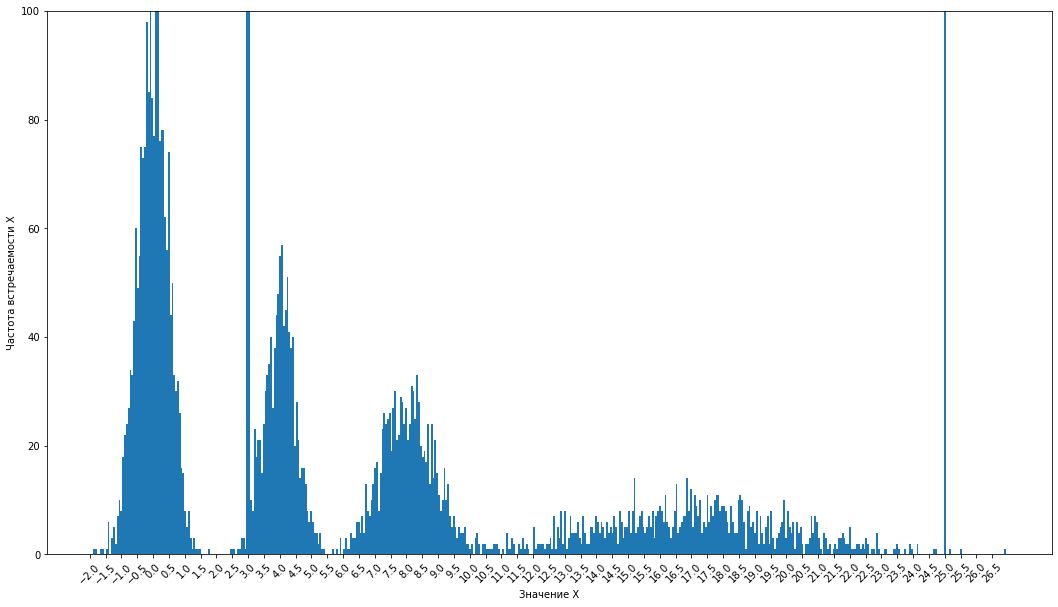

In [5]:
plt.figure(figsize=(18, 10))
plt.hist(data14.X, bins=500)
plt.xticks(np.arange(-2, 27, 0.5), rotation=45)
plt.xlabel("Значение Х")
plt.ylabel("Частота встречаемости Х")
plt.ylim(0, 100)
plt.show()

Чуть-чуть обрезал верхние участки гистограммных столбцов, чтобы можно было содержательно предположить количество гауссиан в выборке.

На приведённом графике отчётливо видно, что выборка состоит из 4 полноценных гауссиан с увеличивающейся по мере увеличения мат ожидания дисперсией. Однако также отчётливо видно два вырожденных распределения, для которых, вероятно, также нужно выделить 2 гауссианы с около-нулевой дисперсией.

$$X_1 \sim N(0, sigma), -2<X<2$$
$$X_2 \sim N(4, sigma*1.5), 2<X<5.5$$
$$X_3 \sim N(0, sigma*0.2), 2.9<X<3.1$$
$$X_4 \sim N(0, sigma*2), 5.5<X<10$$
$$X_5 \sim N(0, sigma*4), 10<X<27$$
$$X_6 \sim N(0, sigma*0.1), 24.8<X<25.2$$

Зададим следующий вектор начальных параметров:

In [6]:
sigma2_1 = data14.X.loc[data14.X<2].var()
p_1 = len(data14.X.loc[data14.X<2])/len(data14)*0.7
sigma2_2 = data14.X.loc[(data14.X>2) & (data14.X<6)].var()
p_2 = len(data14.X.loc[(data14.X>2) & (data14.X<6)])/len(data14)*0.7
sigma2_3 = data14.X.loc[(data14.X>2.9) & (data14.X<3.1)].var()
p_3 = len(data14.X.loc[(data14.X>2.9) & (data14.X<3.1)])/len(data14)*0.7
sigma2_4 = data14.X.loc[(data14.X>5) & (data14.X<10)].var()
p_4 = len(data14.X.loc[(data14.X>5) & (data14.X<10)])/len(data14)*0.7
sigma2_5 = data14.X.loc[(data14.X>9) & (data14.X<27)].var()
p_5 = len(data14.X.loc[(data14.X>9) & (data14.X<27)])/len(data14)*0.7
sigma2_6 = data14.X.loc[(data14.X>24.8) & (data14.X<25.2)].var()
p_6 = 1-p_1-p_2-p_3-p_4-p_5

In [7]:
# theta = (mu_1, sigma2_1, p_1, 
#          mu2, sigma2_2, p_2,
#          mu_3, sigma2_3, p_3,
#          mu_4, sigma2_4, p_4, 
#          mu_5, sigma2_5)
# (воспользовались эвристикой)
theta = np.array([0, sigma2_1, p_1,
                 4, sigma2_2, p_2,
                 3, sigma2_3, p_3,
                 8, sigma2_4, p_4,
                 17, sigma2_5, p_5,
                 25, sigma2_6, p_6])
len(theta)

18

##### (б) Реализуйте EM-алгоритм для нахождения оценки $\hat{\theta}$. Итоговые формулы представьте только в виде кода (то есть не требуется отдельно прикладывать или техать вывод формул).

In [8]:
# Задайте плотность x
def f(x, mu, sigma2):
    return 1 / np.sqrt(2 * np.pi * sigma2) * np.exp(-1/2 * 1/sigma2 * (x - mu)**2)

x = data14.X


In [9]:
# Рассчитайте распределение латентных переменных на наших данных
p_z_1 = f(x, mu = theta[0], sigma2 = theta[1]) * theta[2] / \
            (theta[2] * f(x, mu = theta[0], sigma2 = theta[1]) + \
             (theta[5]) * f(x, mu = theta[3], sigma2 = theta[4]) + \
             (theta[8]) * f(x, mu = theta[6], sigma2 = theta[7]) + \
             (theta[11]) * f(x, mu = theta[9], sigma2 = theta[10]) + \
             (theta[14]) * f(x, mu = theta[12], sigma2 = theta[13]) + \
             (theta[17]) * f(x, mu = theta[15], sigma2 = theta[16]))

p_z_2 = (theta[5]) * f(x, mu = theta[3], sigma2 = theta[4]) / \
            (theta[2] * f(x, mu = theta[0], sigma2 = theta[1]) + \
             (theta[5]) * f(x, mu = theta[3], sigma2 = theta[4]) + \
             (theta[8]) * f(x, mu = theta[6], sigma2 = theta[7]) + \
             (theta[11]) * f(x, mu = theta[9], sigma2 = theta[10]) + \
             (theta[14]) * f(x, mu = theta[12], sigma2 = theta[13]) + \
             (theta[17]) * f(x, mu = theta[15], sigma2 = theta[16]))

p_z_3 = (theta[8]) * f(x, mu = theta[6], sigma2 = theta[7])/ \
            (theta[2] * f(x, mu = theta[0], sigma2 = theta[1]) + \
             (theta[5]) * f(x, mu = theta[3], sigma2 = theta[4]) + \
             (theta[8]) * f(x, mu = theta[6], sigma2 = theta[7]) + \
             (theta[11]) * f(x, mu = theta[9], sigma2 = theta[10]) + \
             (theta[14]) * f(x, mu = theta[12], sigma2 = theta[13]) + \
             (theta[17]) * f(x, mu = theta[15], sigma2 = theta[16]))

p_z_4 = (theta[11]) * f(x, mu = theta[9], sigma2 = theta[10]) / \
            (theta[2] * f(x, mu = theta[0], sigma2 = theta[1]) + \
             (theta[5]) * f(x, mu = theta[3], sigma2 = theta[4]) + \
             (theta[8]) * f(x, mu = theta[6], sigma2 = theta[7]) + \
             (theta[11]) * f(x, mu = theta[9], sigma2 = theta[10]) + \
             (theta[14]) * f(x, mu = theta[12], sigma2 = theta[13]) + \
             (theta[17]) * f(x, mu = theta[15], sigma2 = theta[16]))

p_z_5 = (theta[14]) * f(x, mu = theta[12], sigma2 = theta[13]) / \
            (theta[2] * f(x, mu = theta[0], sigma2 = theta[1]) + \
             (theta[5]) * f(x, mu = theta[3], sigma2 = theta[4]) + \
             (theta[8]) * f(x, mu = theta[6], sigma2 = theta[7]) + \
             (theta[11]) * f(x, mu = theta[9], sigma2 = theta[10]) + \
             (theta[14]) * f(x, mu = theta[12], sigma2 = theta[13]) + \
             (theta[17]) * f(x, mu = theta[15], sigma2 = theta[16]))

p_z_6 = (theta[17]) * f(x, mu = theta[15], sigma2 = theta[16]) / \
            (theta[2] * f(x, mu = theta[0], sigma2 = theta[1]) + \
             (theta[5]) * f(x, mu = theta[3], sigma2 = theta[4]) + \
             (theta[8]) * f(x, mu = theta[6], sigma2 = theta[7]) + \
             (theta[11]) * f(x, mu = theta[9], sigma2 = theta[10]) + \
             (theta[14]) * f(x, mu = theta[12], sigma2 = theta[13]) + \
             (theta[17]) * f(x, mu = theta[15], sigma2 = theta[16]))

p_z_1

0        0.000000e+00
1        8.580548e-11
2        9.999831e-01
3        8.014482e-11
4        0.000000e+00
             ...     
13995    2.797227e-15
13996    7.846876e-11
13997    9.233265e-33
13998    3.004233e-10
13999    0.000000e+00
Name: X, Length: 14000, dtype: float64

In [10]:
# Реализуйте формулы для одного M-шага
mu_1 = np.sum(p_z_1 * x) / np.sum(p_z_1)
mu_2 = np.sum(p_z_2 * x) / np.sum(p_z_2)
mu_3 = np.sum(p_z_3 * x) / np.sum(p_z_3)
mu_4 = np.sum(p_z_4 * x) / np.sum(p_z_4)
mu_5 = np.sum(p_z_5 * x) / np.sum(p_z_5)
mu_6 = np.sum(p_z_6 * x) / np.sum(p_z_6)
sigma2_1 = np.sum((x - mu_1) ** 2 * p_z_1)/ np.sum(p_z_1)
sigma2_2 = np.sum((x - mu_2) ** 2 * p_z_2)/ np.sum(p_z_2)
sigma2_3 = np.sum((x - mu_3) ** 2 * p_z_3)/ np.sum(p_z_3)
sigma2_4 = np.sum((x - mu_4) ** 2 * p_z_4)/ np.sum(p_z_4)
sigma2_5 = np.sum((x - mu_5) ** 2 * p_z_5)/ np.sum(p_z_5)
sigma2_6 = np.sum((x - mu_6) ** 2 * p_z_6)/ np.sum(p_z_6)
p_1 = np.sum(p_z_1) / len(x)
p_2 = np.sum(p_z_2) / len(x)
p_3 = np.sum(p_z_3) / len(x)
p_4 = np.sum(p_z_4) / len(x)
p_5 = np.sum(p_z_5) / len(x)
p_6 = np.sum(p_z_6) / len(x)
theta_new = np.array([mu_1, sigma2_1, p_1,
                 mu_2, sigma2_2, p_2,
                 mu_3, sigma2_3, p_3,
                 mu_4, sigma2_4, p_4,
                 mu_5, sigma2_5, p_5,
                 mu_6, sigma2_6, p_6])
theta

array([0.00000000e+00, 2.40183562e-01, 1.00000000e-01, 4.00000000e+00,
       2.17433134e-01, 2.50300000e-01, 3.00000000e+00, 1.13278384e-04,
       2.01100000e-01, 8.00000000e+00, 8.14939275e-01, 5.11500000e-02,
       1.70000000e+01, 1.41837542e+01, 3.05800000e-01, 2.50000000e+01,
       5.74932320e-06, 9.16500000e-02])

In [11]:
theta_new

array([-7.91472387e-03,  2.39871971e-01,  1.42842226e-01,  3.99046412e+00,
        2.52804116e-01,  7.24542763e-02,  3.00032231e+00,  9.79035520e-05,
        2.84629402e-01,  7.95040463e+00,  5.93996382e-01,  6.25285509e-02,
        1.59631084e+01,  1.52939039e+01,  8.04902599e-02,  2.50000303e+01,
        1.01464637e-06,  3.57055284e-01])

In [12]:
# Логарифм функции плотности x
def lnf(x, mu, sigma2):
    return -1/2 * np.log(2 * np.pi * sigma2) - 1/2 * (x - mu) ** 2 / sigma2

In [13]:
theta_new = np.array([mu_1, sigma2_1, p_1,
                 mu_2, sigma2_2, p_2,
                 mu_3, sigma2_3, p_3,
                 mu_4, sigma2_4, p_4,
                 mu_5, sigma2_5, p_5,
                 mu_6, sigma2_6, p_6])

In [14]:
def Q_f(x, theta, p_z_1, p_z_2, p_z_3, p_z_4, p_z_5, p_z_6):
    ell1 = lnf(x, theta[0], theta[1]) + np.log(theta[2])
    ell2 = lnf(x, theta[3], theta[4]) + np.log(theta[5])
    ell3 = lnf(x, theta[6], theta[7]) + np.log(theta[8])
    ell4 = lnf(x, theta[9], theta[10]) + np.log(theta[11])
    ell5 = lnf(x, theta[12], theta[13]) + np.log(theta[14])
    ell6 = lnf(x, theta[15], theta[16]) + np.log(theta[17])
    return np.sum(p_z_1 * ell1 + p_z_2 * ell2 + p_z_3 * ell3 +\
                 p_z_4 * ell4 + p_z_5 * ell5 + p_z_6 * ell6)

In [15]:
def EM(x, theta, n=100, eps=1e-4):
    
    Q_history = []
    
    for i in range(n):
        
        # E-step
        p_z_1 = f(x, mu = theta[0], sigma2 = theta[1]) * theta[2] / \
            (theta[2] * f(x, mu = theta[0], sigma2 = theta[1]) + \
             (theta[5]) * f(x, mu = theta[3], sigma2 = theta[4]) + \
             (theta[8]) * f(x, mu = theta[6], sigma2 = theta[7]) + \
             (theta[11]) * f(x, mu = theta[9], sigma2 = theta[10]) + \
             (theta[14]) * f(x, mu = theta[12], sigma2 = theta[13]) + \
             (theta[17]) * f(x, mu = theta[15], sigma2 = theta[16]))

        p_z_2 = (theta[5]) * f(x, mu = theta[3], sigma2 = theta[4]) / \
                    (theta[2] * f(x, mu = theta[0], sigma2 = theta[1]) + \
                     (theta[5]) * f(x, mu = theta[3], sigma2 = theta[4]) + \
                     (theta[8]) * f(x, mu = theta[6], sigma2 = theta[7]) + \
                     (theta[11]) * f(x, mu = theta[9], sigma2 = theta[10]) + \
                     (theta[14]) * f(x, mu = theta[12], sigma2 = theta[13]) + \
                     (theta[17]) * f(x, mu = theta[15], sigma2 = theta[16]))

        p_z_3 = (theta[8]) * f(x, mu = theta[6], sigma2 = theta[7])/ \
                    (theta[2] * f(x, mu = theta[0], sigma2 = theta[1]) + \
                     (theta[5]) * f(x, mu = theta[3], sigma2 = theta[4]) + \
                     (theta[8]) * f(x, mu = theta[6], sigma2 = theta[7]) + \
                     (theta[11]) * f(x, mu = theta[9], sigma2 = theta[10]) + \
                     (theta[14]) * f(x, mu = theta[12], sigma2 = theta[13]) + \
                     (theta[17]) * f(x, mu = theta[15], sigma2 = theta[16]))

        p_z_4 = (theta[11]) * f(x, mu = theta[9], sigma2 = theta[10]) / \
                    (theta[2] * f(x, mu = theta[0], sigma2 = theta[1]) + \
                     (theta[5]) * f(x, mu = theta[3], sigma2 = theta[4]) + \
                     (theta[8]) * f(x, mu = theta[6], sigma2 = theta[7]) + \
                     (theta[11]) * f(x, mu = theta[9], sigma2 = theta[10]) + \
                     (theta[14]) * f(x, mu = theta[12], sigma2 = theta[13]) + \
                     (theta[17]) * f(x, mu = theta[15], sigma2 = theta[16]))

        p_z_5 = (theta[14]) * f(x, mu = theta[12], sigma2 = theta[13]) / \
                    (theta[2] * f(x, mu = theta[0], sigma2 = theta[1]) + \
                     (theta[5]) * f(x, mu = theta[3], sigma2 = theta[4]) + \
                     (theta[8]) * f(x, mu = theta[6], sigma2 = theta[7]) + \
                     (theta[11]) * f(x, mu = theta[9], sigma2 = theta[10]) + \
                     (theta[14]) * f(x, mu = theta[12], sigma2 = theta[13]) + \
                     (theta[17]) * f(x, mu = theta[15], sigma2 = theta[16]))

        p_z_6 = (theta[17]) * f(x, mu = theta[15], sigma2 = theta[16]) / \
                    (theta[2] * f(x, mu = theta[0], sigma2 = theta[1]) + \
                     (theta[5]) * f(x, mu = theta[3], sigma2 = theta[4]) + \
                     (theta[8]) * f(x, mu = theta[6], sigma2 = theta[7]) + \
                     (theta[11]) * f(x, mu = theta[9], sigma2 = theta[10]) + \
                     (theta[14]) * f(x, mu = theta[12], sigma2 = theta[13]) + \
                     (theta[17]) * f(x, mu = theta[15], sigma2 = theta[16]))
        
        Q_history.append(Q_f(x, theta, p_z_1, p_z_2, p_z_3, p_z_4, p_z_5, p_z_6))
        
        if i > 0:
            if (Q_history[i] - Q_history[i-1])**2 < eps:
                break
        
        # M-step
        mu_1 = np.sum(p_z_1 * x) / np.sum(p_z_1)
        mu_2 = np.sum(p_z_2 * x) / np.sum(p_z_2)
        mu_3 = np.sum(p_z_3 * x) / np.sum(p_z_3)
        mu_4 = np.sum(p_z_4 * x) / np.sum(p_z_4)
        mu_5 = np.sum(p_z_5 * x) / np.sum(p_z_5)
        mu_6 = np.sum(p_z_6 * x) / np.sum(p_z_6)
        sigma2_1 = np.sum((x - mu_1) ** 2 * p_z_1)/ np.sum(p_z_1)
        sigma2_2 = np.sum((x - mu_2) ** 2 * p_z_2)/ np.sum(p_z_2)
        sigma2_3 = np.sum((x - mu_3) ** 2 * p_z_3)/ np.sum(p_z_3)
        sigma2_4 = np.sum((x - mu_4) ** 2 * p_z_4)/ np.sum(p_z_4)
        sigma2_5 = np.sum((x - mu_5) ** 2 * p_z_5)/ np.sum(p_z_5)
        sigma2_6 = np.sum((x - mu_6) ** 2 * p_z_6)/ np.sum(p_z_6)
        p_1 = np.sum(p_z_1) / len(x)
        p_2 = np.sum(p_z_2) / len(x)
        p_3 = np.sum(p_z_3) / len(x)
        p_4 = np.sum(p_z_4) / len(x)
        p_5 = np.sum(p_z_5) / len(x)
        p_6 = np.sum(p_z_6) / len(x)
        theta_new = np.array([mu_1, sigma2_1, p_1,
                         mu_2, sigma2_2, p_2,
                         mu_3, sigma2_3, p_3,
                         mu_4, sigma2_4, p_4,
                         mu_5, sigma2_5, p_5,
                         mu_6, sigma2_6, p_6])
        
        theta = theta_new
    
    return (theta, Q_history)

In [16]:
theta, Q = EM(x, theta)
theta

array([-7.80466575e-03,  2.40046639e-01,  1.42856229e-01,  4.00864066e+00,
        2.40027164e-01,  7.12548478e-02,  3.00033350e+00,  9.87252114e-05,
        2.85908528e-01,  8.02341063e+00,  6.90405875e-01,  7.14163092e-02,
        1.68921887e+01,  9.08577289e+00,  7.14232074e-02,  2.50000303e+01,
        1.01467845e-06,  3.57140878e-01])

##### (в) Постройте график $Q$ в зависимости от числа итераций.

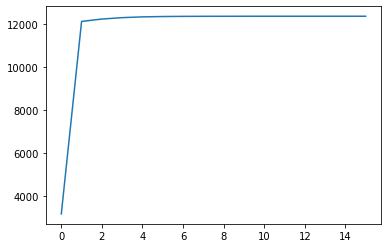

In [17]:
plt.plot(Q)

##### (г) Являются ли полученные оценки параметров адекватными (адекватность оцените визуально по гистограмме). Если нет, приведите возможную причину провала EM-алгоритма. 

In [18]:
p_z_1 = f(x, mu = theta[0], sigma2 = theta[1]) * theta[2] / \
            (theta[2] * f(x, mu = theta[0], sigma2 = theta[1]) + \
             (theta[5]) * f(x, mu = theta[3], sigma2 = theta[4]) + \
             (theta[8]) * f(x, mu = theta[6], sigma2 = theta[7]) + \
             (theta[11]) * f(x, mu = theta[9], sigma2 = theta[10]) + \
             (theta[14]) * f(x, mu = theta[12], sigma2 = theta[13]) + \
             (theta[17]) * f(x, mu = theta[15], sigma2 = theta[16]))

p_z_2 = (theta[5]) * f(x, mu = theta[3], sigma2 = theta[4]) / \
        (theta[2] * f(x, mu = theta[0], sigma2 = theta[1]) + \
         (theta[5]) * f(x, mu = theta[3], sigma2 = theta[4]) + \
         (theta[8]) * f(x, mu = theta[6], sigma2 = theta[7]) + \
         (theta[11]) * f(x, mu = theta[9], sigma2 = theta[10]) + \
         (theta[14]) * f(x, mu = theta[12], sigma2 = theta[13]) + \
         (theta[17]) * f(x, mu = theta[15], sigma2 = theta[16]))

p_z_3 = (theta[8]) * f(x, mu = theta[6], sigma2 = theta[7])/ \
        (theta[2] * f(x, mu = theta[0], sigma2 = theta[1]) + \
         (theta[5]) * f(x, mu = theta[3], sigma2 = theta[4]) + \
         (theta[8]) * f(x, mu = theta[6], sigma2 = theta[7]) + \
         (theta[11]) * f(x, mu = theta[9], sigma2 = theta[10]) + \
         (theta[14]) * f(x, mu = theta[12], sigma2 = theta[13]) + \
         (theta[17]) * f(x, mu = theta[15], sigma2 = theta[16]))

p_z_4 = (theta[11]) * f(x, mu = theta[9], sigma2 = theta[10]) / \
        (theta[2] * f(x, mu = theta[0], sigma2 = theta[1]) + \
         (theta[5]) * f(x, mu = theta[3], sigma2 = theta[4]) + \
         (theta[8]) * f(x, mu = theta[6], sigma2 = theta[7]) + \
         (theta[11]) * f(x, mu = theta[9], sigma2 = theta[10]) + \
         (theta[14]) * f(x, mu = theta[12], sigma2 = theta[13]) + \
         (theta[17]) * f(x, mu = theta[15], sigma2 = theta[16]))

p_z_5 = (theta[14]) * f(x, mu = theta[12], sigma2 = theta[13]) / \
        (theta[2] * f(x, mu = theta[0], sigma2 = theta[1]) + \
         (theta[5]) * f(x, mu = theta[3], sigma2 = theta[4]) + \
         (theta[8]) * f(x, mu = theta[6], sigma2 = theta[7]) + \
         (theta[11]) * f(x, mu = theta[9], sigma2 = theta[10]) + \
         (theta[14]) * f(x, mu = theta[12], sigma2 = theta[13]) + \
         (theta[17]) * f(x, mu = theta[15], sigma2 = theta[16]))

p_z_6 = (theta[17]) * f(x, mu = theta[15], sigma2 = theta[16]) / \
        (theta[2] * f(x, mu = theta[0], sigma2 = theta[1]) + \
         (theta[5]) * f(x, mu = theta[3], sigma2 = theta[4]) + \
         (theta[8]) * f(x, mu = theta[6], sigma2 = theta[7]) + \
         (theta[11]) * f(x, mu = theta[9], sigma2 = theta[10]) + \
         (theta[14]) * f(x, mu = theta[12], sigma2 = theta[13]) + \
         (theta[17]) * f(x, mu = theta[15], sigma2 = theta[16]))

pseudo_probas = np.vstack([p_z_1, p_z_2, p_z_3, p_z_4, p_z_5, p_z_6])
clusters = np.argmax(pseudo_probas, axis=0)

In [19]:
np.bincount(clusters)

array([2000,  991, 4010, 1010,  989, 5000], dtype=int64)

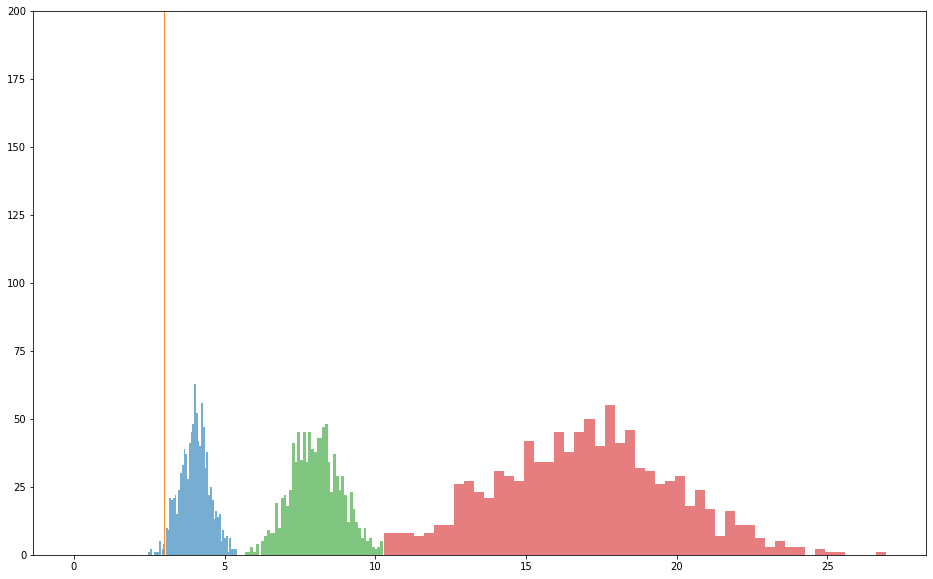

In [45]:
plt.figure(figsize=(16, 10))
plt.hist(x[clusters==1], alpha = 0.6, bins=50)
plt.hist(x[clusters==2], alpha = 0.9, bins=50)
plt.hist(x[clusters==3], alpha = 0.6, bins=50)
plt.hist(x[clusters==4], alpha = 0.6, bins=50)
plt.hist(x[clusters==5], alpha = 0.6, color='cyan', bins=5)
plt.hist(x[clusters==6], alpha = 0.9, color='black', bins=5)
plt.ylim(0, 200)
plt.show()

Видим, что в целом 4 прикинутых изначально распределения действительно весьма успешно определились ЕМ-алгоритмом, однако нормальное распределение в окрестности 0 и вырожденное распределение в окрестности 25 куда-то испарились. Возможно, при более детальном подходе к визуализации работы алгоритма получилось бы найти, куда же они спрятались...

#### Задача 15. Из контрольной прошлого года

В контрольной работе прошлого года была такая задача:

> У меня есть три монетки. Они выпадают орлом с вероятностями $p_1$, $p_2$ и $p_3 = 1$. Я провожу эксперимент из 100 раундов. В каждом раунде я равновероятно выбираю одну из монеток, подбрасываю её два раза и записываю число выпавших орлов. После окончания эксперимента у меня на бумажке остаётся 100 записанных чисел. Какая монетка подкидывалась в каждом раунде, я не помню.

На контрольной требовалось описать EM-алгоритм для нахождения $\hat{p}_1$ и $\hat{p}_2$.

**[а]** **(3 балла)** В файле `15.csv` приведена описанная выборка из 100 чисел. Реализуйте EM-алгоритм для нахождения $\hat{p}_1$ и $\hat{p}_2$.

**[б]** Постройте график $Q$ в зависимости от числа итераций.

**[в]** Изучите выборку и прокомментируйте адекватность полученных оценок.

In [11]:
data15 = pd.read_csv('https://raw.githubusercontent.com/V-Marco/psmo_21_22/main/hw/hw1/15.csv', 
                     usecols=[1])
data15

,X
0,2
1,1
2,2
3,2
4,0
...,...
95,1
96,2
97,2
98,1


In [12]:
data15.value_counts()

X
2    38
1    32
0    30
dtype: int64

##### (a) Реализуйте EM-алгоритм для нахождения $\hat{p}_1$ и $\hat{p}_2$.

##### (б) Постройте график $Q$ в зависимости от числа итераций.

##### (в) Изучите выборку и прокомментируйте адекватность полученных оценок.

#### Задача 16. Бутстраппируем!

Исследователь Валентин каждый день ловит покемонов. По причинам, которые Валентин предпочитает не раскрывать, он совершает ровно 15 попыток поймать покемона за день. Каждая попытка может окончиться успехом с некоторой вероятностью. В файле `16.csv` представлены наблюдения о пойманных покемонах за 3 года. 

**[а]** Сделайте предположение о том, какое распределение имеет число пойманных за день покемонов. Это распределение должно иметь один неизвестный параметр.

**[б]** Найдите точечную оценку неизвестного параметра методом максимального правдоподобия.

**[в]** **(2 балла)** Постройте 95%-ый доверительный интервал для неизвестного параметра при помощи методов **Reverse bootstrap percentile**, **t-bootstrap** и **параметрического бутстрэпа**. 

In [15]:
data16 = pd.read_csv('https://raw.githubusercontent.com/V-Marco/psmo_21_22/main/hw/hw1/16.csv', 
                     usecols=[1])
data16

,X
0,10
1,9
2,11
3,9
4,9
...,...
1090,8
1091,10
1092,8
1093,13


##### (a) Сделайте предположение о том, какое распределение имеет число пойманных за день покемонов. Это распределение должно иметь один неизвестный параметр

Без каких-либо расчётов кажется, что распределение, содержащее в себе лишь один неизвестный параметр и имеющее при этом ограниченное количество попыток, известное нам - это биномиальное с параметрами $n=15$, $p=p_T$

In [39]:
data16.value_counts().sort_index()

X 
4       3
5       8
6      37
7      62
8     146
9     218
10    219
11    197
12    130
13     53
14     20
15      2
dtype: int64

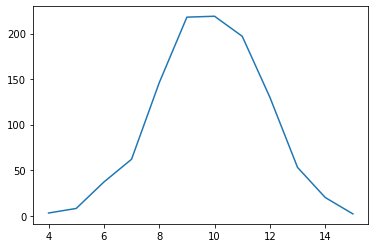

In [34]:
plt.plot(sorted(data16['X'].unique()), 
            data16.value_counts().sort_index().values)

<AxesSubplot:xlabel='X', ylabel='Density'>

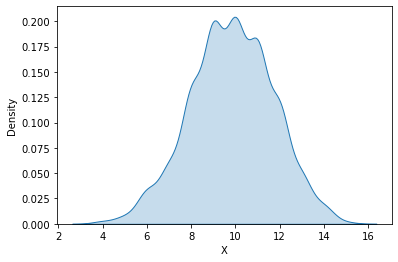

In [38]:
sns.kdeplot(data=data16, x="X", fill=True)

После проведения визуального анализа имеющихся данных можно сделать вывод, что гипотеза о соответствии рапределения ряда биномиальному не отвергается

##### (б) Найдите точечную оценку неизвестного параметра методом максимального правдоподобия

In [40]:
np.sum(data16.X)

10754

$\hat{p} = \frac{1}{N\cdot n}\sum_{i=1}^{N} x_i$

$N=1094$

$n=15$

$\sum_{i=1}^{N} x_i = 10754$

$\hat{p} = \frac{1}{1094\cdot 15}\cdot 10754 = 0.6553$

In [46]:
p_hat = 10754/(1094*15)
p_hat

0.6553321145642901

##### (в) Постройте 95%-ый доверительный интервал для неизвестного параметра при помощи методов **Reverse bootstrap percentile**, **t-bootstrap** и **параметрического бутстрэпа**.